
Importamos la librería "pandas" de Python para poder importar, manipular y analizar los datos, la librería "numpy" para procesar matrices y vectores, y las librerías "matplotlib" y "seaborn" para tener varias opciones de graficación de los resultados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

In [7]:
df = pd.read_excel("dataset_original_evyth_microdatos.xlsx")

In [8]:
print(df.head())

   id_hogar  id_viajes  miembro  anio  trimestre  region_origen  \
0        71      41201        3  2012          1              2   
1        71      41201        4  2012          1              2   
2        71      61201        3  2012          1              2   
3        71      41201        1  2012          1              2   
4        71      41201        2  2012          1              2   

   aglomerado_origen  region_destino  provincia_destino localidad_destino  \
0                 33               3                  6      Mar del Tuyú   
1                 33               3                  6      Mar del Tuyú   
2                 33               3                  6              Reta   
3                 33               3                  6      Mar del Tuyú   
4                 33               3                  6      Mar del Tuyú   

   ...  p006  p006_agrup  p007  nivel_ed  cond_act  p013  j_sexo  j_edad  \
0  ...    23           2   1.0         8         1     2  

Quiero averiguar qué región tuvo mas visitas, primero chequeo valores nulos.

In [28]:
print(df['region_destino'].isnull().sum())
print(df['provincia_destino'].isnull().sum())
print(df['localidad_destino'].isnull().sum())

0
0
0


Imprimo cantidad de viajes por región.


In [10]:
viajes_por_region = df['region_destino'].value_counts()
resultado = pd.DataFrame({
    'Número de Viajes': viajes_por_region,
})
print(resultado)

                Número de Viajes
region_destino                  
3                         115301
4                          79481
6                          75722
5                          70140
7                          48860
8                          43550
1                          16469
2                           6012


Imprimo cantidad de viajes por provincia.

In [11]:
viajes_por_provincia = df['provincia_destino'].value_counts()
resultado = pd.DataFrame({
    'Número de Viajes provincia': viajes_por_provincia,
})
print(resultado)

                   Número de Viajes provincia
provincia_destino                            
6                                      115301
14                                      79481
82                                      27517
50                                      26176
90                                      21195
66                                      20543
30                                      18127
2                                       16469
62                                      12461
74                                      12327
26                                      11685
18                                      10786
38                                      10427
70                                      10357
86                                       9078
10                                       8981
58                                       8683
54                                       7783
4                                        6012
46                                

Le pregunto cuantas visitas tuvo Cordoba, Salta y Neuquen

In [27]:
visitas_cordoba = df[df['provincia_destino'] == 14].shape[0]
print(f'Número de visitas a Cordoba: {visitas_cordoba}')
visitas_salta = df[df['provincia_destino'] == 66].shape[0]
print(f'Número de visitas a Salta: {visitas_salta}')
visitas_neuquen = df[df['provincia_destino'] == 58].shape[0]
print(f'Número de visitas a Neuquen: {visitas_neuquen}')

Número de visitas a Cordoba: 0
Número de visitas a Salta: 0
Número de visitas a Neuquen: 0


**ES MEJOR TRABAJAR CON LOS NOMBRES DE LAS CIUDADES, PROVINCIAS, REGIONES Y NO CON CÓDIGOS NUMÉRICOS**

In [ ]:

# Leer el archivo sin encabezados
tabla_codigos = pd.read_excel('codigo_regiones.xlsx', header=None)

# Mostrar las primeras filas para verificar
print(tabla_codigos)

       0                                             1
0    NaN                Región de residencia del hogar
1    1.0                        Ciudad de Buenos Aires
2    2.0  Provincia de Buenos Aires - Partidos del GBA
3    3.0             Provincia de Buenos Aires - Resto
4    4.0                                        Centro
..   ...                                           ...
72  78.0                                    Santa Cruz
73  82.0                                      Santa Fe
74  86.0                           Santiago del Estero
75  90.0                                       Tucumán
76  94.0                              Tierra del Fuego

[77 rows x 2 columns]


In [16]:
diccionario_regiones = dict(zip(tabla_codigos[0], tabla_codigos[1]))

# Verificar el diccionario
print(diccionario_regiones)

{nan: 'Región de residencia del hogar', 1.0: 'Ciudad de Buenos Aires', 2.0: 'CABA', 3.0: 'Provincia de Buenos Aires - Resto', 4.0: 'Partidos del GBA (Pcia. Bs. As.)', 5.0: 'Litoral', 6.0: 'Buenos Aires (Resto)', 7.0: 'Cuyo', 8.0: 'Patagonia', nan: 'Aglomerado de residencia del hogar', 9.0: 'Comodoro Rivadavia - Rada Tilly', 10.0: 'Catamarca', 12.0: 'Corrientes', 13.0: 'Gran Córdoba', 14.0: 'Córdoba', 15.0: 'Formosa', 17.0: 'Neuquén - Plottier', 18.0: 'Corrientes', 19.0: 'Jujuy - Palpalá', 20.0: 'Río Gallegos', 22.0: 'Chaco', 23.0: 'Salta', 25.0: 'La Rioja', 26.0: 'Chubut', 27.0: 'Gran San Juan', 29.0: 'Gran Tucumán - TafiViejo', 30.0: 'Entre Ríos', 31.0: 'Ushuaia - Rio Grande', 32.0: 'Ciudad de Buenos Aires', 33.0: 'Partidos del GBA', 34.0: 'Formosa', 36.0: 'Río Cuarto', 38.0: 'Jujuy', 91.0: 'Rawson - Trelew', 93.0: 'Viedma - Carmen de Patagones', nan: 'Region de destino', nan: 'Provincia de destino', 42.0: 'La Pampa', 46.0: 'La Rioja', 50.0: 'Mendoza', 54.0: 'Misiones', 58.0: 'Neuquén

In [17]:
df['region_destino'] = df['region_destino'].replace(diccionario_regiones)

# Verificar el resultado
print(df.head())

   id_hogar  id_viajes  miembro  anio  trimestre  region_origen  \
0        71      41201        3  2012          1              2   
1        71      41201        4  2012          1              2   
2        71      61201        3  2012          1              2   
3        71      41201        1  2012          1              2   
4        71      41201        2  2012          1              2   

   aglomerado_origen                     region_destino  provincia_destino  \
0                 33  Provincia de Buenos Aires - Resto                  6   
1                 33  Provincia de Buenos Aires - Resto                  6   
2                 33  Provincia de Buenos Aires - Resto                  6   
3                 33  Provincia de Buenos Aires - Resto                  6   
4                 33  Provincia de Buenos Aires - Resto                  6   

  localidad_destino  ...  p006  p006_agrup  p007  nivel_ed  cond_act  p013  \
0      Mar del Tuyú  ...    23           2   1.0  

In [18]:
df['region_origen'] = df['region_origen'].replace(diccionario_regiones)

# Verificar el resultado
print(df.head())

   id_hogar  id_viajes  miembro  anio  trimestre region_origen  \
0        71      41201        3  2012          1          CABA   
1        71      41201        4  2012          1          CABA   
2        71      61201        3  2012          1          CABA   
3        71      41201        1  2012          1          CABA   
4        71      41201        2  2012          1          CABA   

   aglomerado_origen                     region_destino  provincia_destino  \
0                 33  Provincia de Buenos Aires - Resto                  6   
1                 33  Provincia de Buenos Aires - Resto                  6   
2                 33  Provincia de Buenos Aires - Resto                  6   
3                 33  Provincia de Buenos Aires - Resto                  6   
4                 33  Provincia de Buenos Aires - Resto                  6   

  localidad_destino  ...  p006  p006_agrup  p007  nivel_ed  cond_act  p013  \
0      Mar del Tuyú  ...    23           2   1.0        

In [19]:
visitantes_por_region = df['region_destino'].value_counts()
resultado = pd.DataFrame({
    'Número de Viajes': visitantes_por_region,
})
print(resultado)

                                   Número de Viajes
region_destino                                     
Provincia de Buenos Aires - Resto            115301
Partidos del GBA (Pcia. Bs. As.)              79481
Buenos Aires (Resto)                          75722
Litoral                                       70140
Cuyo                                          48860
Patagonia                                     43550
Ciudad de Buenos Aires                        16469
CABA                                           6012


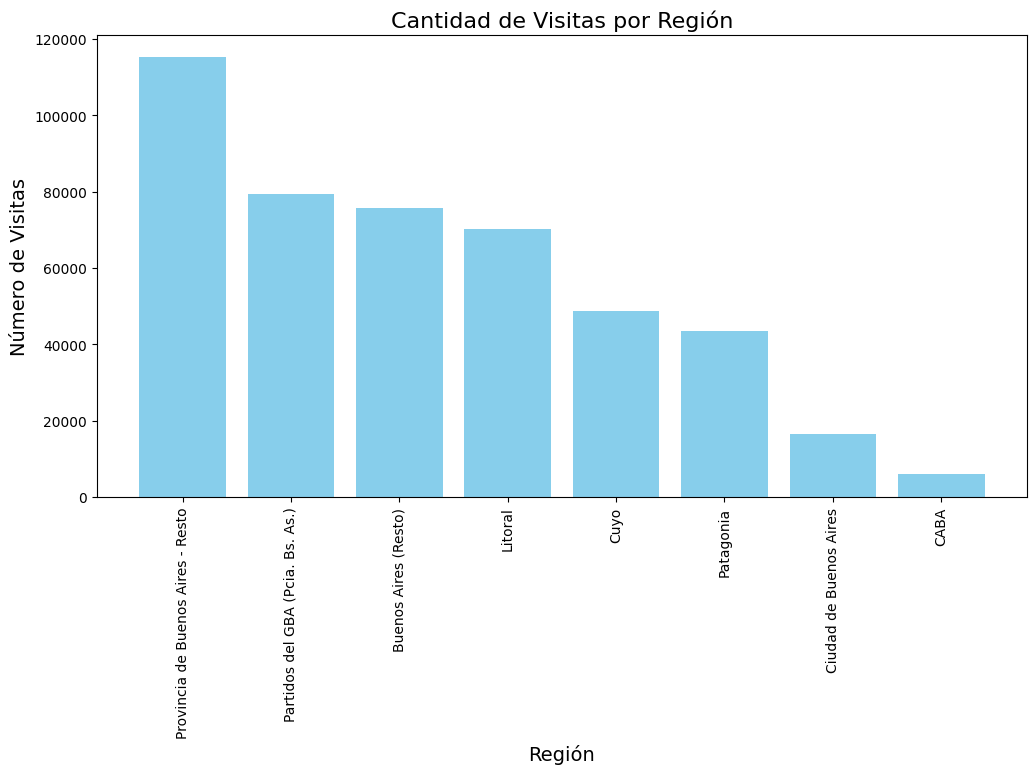

In [20]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
plt.bar(visitantes_por_region.index, visitantes_por_region.values, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Cantidad de Visitas por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Número de Visitas', fontsize=14)


# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

***PROVINCIAS***

In [22]:
# Leer el archivo sin encabezados
tabla_codigos_provincia = pd.read_excel('codigo_provincias.xlsx', header=None)

# Mostrar las primeras filas para verificar
print(tabla_codigos_provincia)

       0                                   1
0    NaN  Aglomerado de residencia del hogar
1    2.0                       Gran La Plata
2    3.0                Bahía Blanca - Cerri
3    4.0                        Gran Rosario
4    5.0                       Gran Santa Fe
..   ...                                 ...
63  78.0                          Santa Cruz
64  82.0                            Santa Fe
65  86.0                 Santiago del Estero
66  90.0                             Tucumán
67  94.0                    Tierra del Fuego

[68 rows x 2 columns]


In [23]:
diccionario_provincias = dict(zip(tabla_codigos_provincia[0], tabla_codigos_provincia[1]))

# Verificar el diccionario
print(diccionario_provincias)

{nan: 'Aglomerado de residencia del hogar', 2.0: 'CABA', 3.0: 'Provincia de Buenos Aires - Resto', 4.0: 'Partidos del GBA (Pcia. Bs. As.)', 5.0: 'Litoral', 6.0: 'Buenos Aires (Resto)', 7.0: 'Cuyo', 8.0: 'Patagonia', 9.0: 'Comodoro Rivadavia - Rada Tilly', 10.0: 'Catamarca', 12.0: 'Corrientes', 13.0: 'Gran Córdoba', 14.0: 'Córdoba', 15.0: 'Formosa', 17.0: 'Neuquén - Plottier', 18.0: 'Corrientes', 19.0: 'Jujuy - Palpalá', 20.0: 'Río Gallegos', 22.0: 'Chaco', 23.0: 'Salta', 25.0: 'La Rioja', 26.0: 'Chubut', 27.0: 'Gran San Juan', 29.0: 'Gran Tucumán - TafiViejo', 30.0: 'Entre Ríos', 31.0: 'Ushuaia - Rio Grande', 32.0: 'Ciudad de Buenos Aires', 33.0: 'Partidos del GBA', 34.0: 'Formosa', 36.0: 'Río Cuarto', 38.0: 'Jujuy', 91.0: 'Rawson - Trelew', 93.0: 'Viedma - Carmen de Patagones', nan: 'Region de destino', 1.0: 'Ciudad de Buenos Aires', nan: 'Provincia de destino', 42.0: 'La Pampa', 46.0: 'La Rioja', 50.0: 'Mendoza', 54.0: 'Misiones', 58.0: 'Neuquén', 62.0: 'Río Negro', 66.0: 'Salta', 70

In [24]:
df['provincia_destino'] = df['provincia_destino'].replace(diccionario_provincias)

# Verificar el resultado
print(df.head())

   id_hogar  id_viajes  miembro  anio  trimestre region_origen  \
0        71      41201        3  2012          1          CABA   
1        71      41201        4  2012          1          CABA   
2        71      61201        3  2012          1          CABA   
3        71      41201        1  2012          1          CABA   
4        71      41201        2  2012          1          CABA   

   aglomerado_origen                     region_destino     provincia_destino  \
0                 33  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
1                 33  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
2                 33  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
3                 33  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
4                 33  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   

  localidad_destino  ...  p006  p006_agrup  p007  nivel_ed  cond_act  p013  \
0      Mar del Tuyú  ...    23        

In [25]:
viajes_por_provincia = df['provincia_destino'].value_counts()
resultado = pd.DataFrame({
    'Número de Viajes provincia': viajes_por_provincia,
})
print(resultado)

                                  Número de Viajes provincia
provincia_destino                                           
Buenos Aires (Resto)                                  115301
Córdoba                                                79481
Santa Fe                                               27517
Mendoza                                                26176
Tucumán                                                21195
Salta                                                  20543
Entre Ríos                                             18127
CABA                                                   16469
Río Negro                                              12461
San Luis                                               12327
Chubut                                                 11685
Corrientes                                             10786
Jujuy                                                  10427
San Juan                                               10357
Santiago del Estero     

**AGLOMERADOS**

In [29]:
# Leer el archivo sin encabezados
tabla_codigos_aglomerados = pd.read_excel('codigo_aglomerados.xlsx', header=None)

# Mostrar las primeras filas para verificar
print(tabla_codigos_aglomerados)

       0                                   1
0    NaN  Aglomerado de residencia del hogar
1    2.0                       Gran La Plata
2    3.0                Bahía Blanca - Cerri
3    4.0                        Gran Rosario
4    5.0                       Gran Santa Fe
5    6.0                         Gran Parana
6    7.0                             Posadas
7    8.0                    Gran Resistencia
8    9.0     Comodoro Rivadavia - Rada Tilly
9   10.0                        Gran Mendoza
10  12.0                          Corrientes
11  13.0                        Gran Córdoba
12  14.0                           Concordia
13  15.0                             Formosa
14  17.0                  Neuquén - Plottier
15  18.0      Santiago del Estero - La Banda
16  19.0                     Jujuy - Palpalá
17  20.0                        Río Gallegos
18  22.0                      Gran Catamarca
19  23.0                               Salta
20  25.0                            La Rioja
21  26.0  

In [30]:
diccionario_aglomerados = dict(zip(tabla_codigos_aglomerados[0], tabla_codigos_aglomerados[1]))

# Verificar el diccionario
print(diccionario_aglomerados)

{nan: 'Aglomerado de residencia del hogar', 2.0: 'Gran La Plata', 3.0: 'Bahía Blanca - Cerri', 4.0: 'Gran Rosario', 5.0: 'Gran Santa Fe', 6.0: 'Gran Parana', 7.0: 'Posadas', 8.0: 'Gran Resistencia', 9.0: 'Comodoro Rivadavia - Rada Tilly', 10.0: 'Gran Mendoza', 12.0: 'Corrientes', 13.0: 'Gran Córdoba', 14.0: 'Concordia', 15.0: 'Formosa', 17.0: 'Neuquén - Plottier', 18.0: 'Santiago del Estero - La Banda', 19.0: 'Jujuy - Palpalá', 20.0: 'Río Gallegos', 22.0: 'Gran Catamarca', 23.0: 'Salta', 25.0: 'La Rioja', 26.0: 'San Luis - El Chorrillo', 27.0: 'Gran San Juan', 29.0: 'Gran Tucumán - TafiViejo', 30.0: 'Santa Rosa - Toay', 31.0: 'Ushuaia - Rio Grande', 32.0: 'Ciudad de Buenos Aires', 33.0: 'Partidos del GBA', 34.0: 'Mar del Plata - Batán', 36.0: 'Río Cuarto', 38.0: 'San Nicolás - Villa Constitución', 91.0: 'Rawson - Trelew', 93.0: 'Viedma - Carmen de Patagones'}


In [31]:
df['aglomerado_origen'] = df['aglomerado_origen'].replace(diccionario_aglomerados)

# Verificar el resultado
print(df.head())

   id_hogar  id_viajes  miembro  anio  trimestre region_origen  \
0        71      41201        3  2012          1          CABA   
1        71      41201        4  2012          1          CABA   
2        71      61201        3  2012          1          CABA   
3        71      41201        1  2012          1          CABA   
4        71      41201        2  2012          1          CABA   

  aglomerado_origen                     region_destino     provincia_destino  \
0  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
1  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
2  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
3  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
4  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   

  localidad_destino  ...  p006  p006_agrup  p007  nivel_ed  cond_act  p013  \
0      Mar del Tuyú  ...    23           2  

**LOCALIDADES**

In [32]:
viajes_por_localidad = df['localidad_destino'].value_counts()
resultado = pd.DataFrame({
    'Número de Viajes localidad': viajes_por_localidad,
})
print(resultado)

                        Número de Viajes localidad
localidad_destino                                 
Villa Carlos Paz                             17321
Ciudad de Buenos Aires                       16469
Mar del Plata                                12511
Córdoba                                       8071
Rosario                                       6876
...                                            ...
Olacapato                                        1
Todd                                             1
Arizona                                          1
Beazley                                          1
Osvaldo Magnasco                                 1

[2362 rows x 1 columns]


*NOTA: Si bien la provincia que mas visitas recibe es Buenos Aires, sus turistas estás esparcidos en muchas ciudades del interior. Villa Carlos Paz es la ciudad que más registros de entrada tiene*

In [33]:
top_10_localidades = resultado.head(10)
print(top_10_localidades)

                        Número de Viajes localidad
localidad_destino                                 
Villa Carlos Paz                             17321
Ciudad de Buenos Aires                       16469
Mar del Plata                                12511
Córdoba                                       8071
Rosario                                       6876
Pilar                                         6158
Salta                                         5518
Potrerillos                                   5173
Termas de Río Hondo                           5136
Luján                                         4757


C:\Users\yamal\AppData\Local\Temp\ipykernel_18556\4264790235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x='Número de Viajes localidad', y='localidad_destino', data=top_10_localidades, palette='viridis')


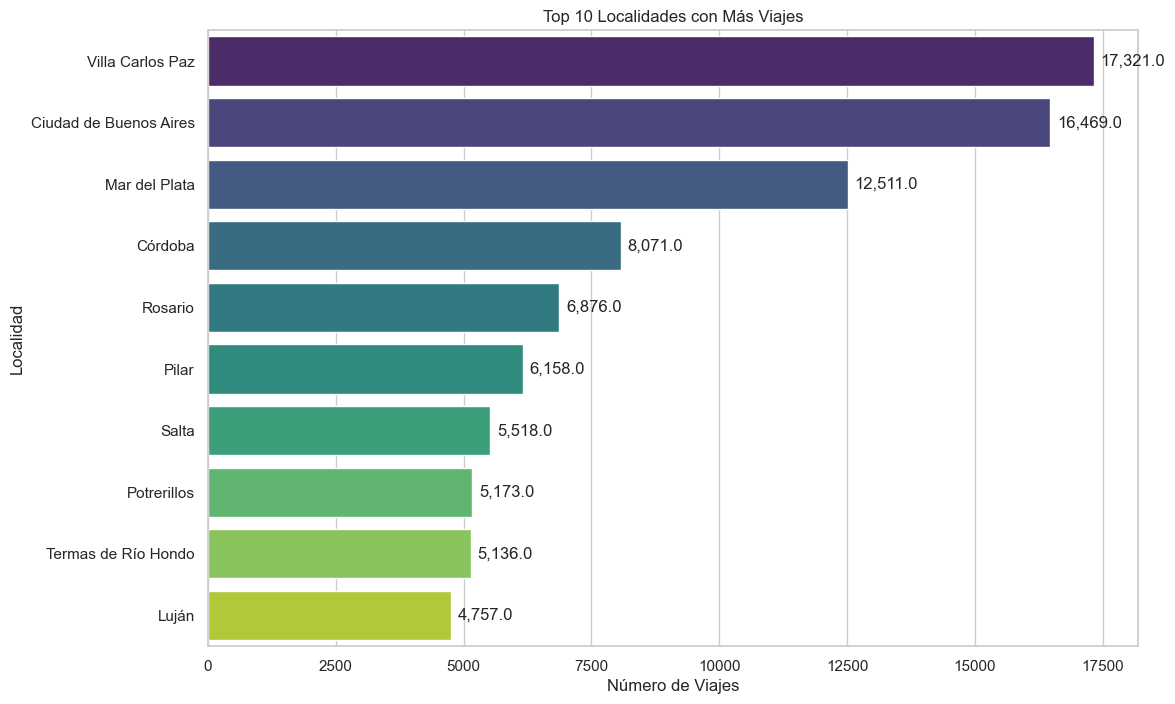

In [34]:
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
grafico = sns.barplot(x='Número de Viajes localidad', y='localidad_destino', data=top_10_localidades, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Número de Viajes')
plt.ylabel('Localidad')
plt.title('Top 10 Localidades con Más Viajes')

# Mostrar la cantidad exacta de viajes sobre cada barra
for p in grafico.patches:
    grafico.annotate(format(p.get_width(), ','),
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left',
                     va='center',
                     xytext=(5, 0),
                     textcoords='offset points')

# Mostrar el gráfico
plt.show()

**DESCARGO EL NUEVO DF EN EXCEL**

In [37]:
df = pd.read_excel('turismo_modificado.xlsx')

In [38]:
print(df.head())

   id_hogar  anio  trimestre                                 region_origen  \
0        71  2012          1  Provincia de Buenos Aires - Partidos del GBA   
1        71  2012          1  Provincia de Buenos Aires - Partidos del GBA   
2        71  2012          1  Provincia de Buenos Aires - Partidos del GBA   
3        71  2012          1  Provincia de Buenos Aires - Partidos del GBA   
4        71  2012          1  Provincia de Buenos Aires - Partidos del GBA   

  aglomerado_origen                     region_destino     provincia_destino  \
0  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
1  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
2  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
3  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   
4  Partidos del GBA  Provincia de Buenos Aires - Resto  Buenos Aires (Resto)   

  localidad_destino  tipo_visitante  px06_agrup  .

**SOLO VOY A ANALIZAR CORDOBA**

In [39]:
provincias_unicas = df['provincia_destino'].unique()
print(provincias_unicas)

['Buenos Aires (Resto)' 'CABA' 'San Juan' 'Mendoza' 'Misiones' 'Salta'
 'San Luis' 'Corrientes' 'Jujuy' 'Córdoba' 'Neuquén' 'Entre Ríos'
 'Río Negro' 'Partidos del GBA (Pcia. Bs. As.)' 'Tucumán' 'Catamarca'
 'Santa Fe' 'Santa Cruz' 'Chaco' 'Chubut' 'Tierra del Fuego'
 'Santiago del Estero' 'La Pampa' 'La Rioja' 'Formosa']


In [40]:
df_cordoba = df[df['provincia_destino'] == 'Córdoba']
df_cordoba.head()


,id_hogar,anio,trimestre,region_origen,aglomerado_origen,region_destino,provincia_destino,localidad_destino,tipo_visitante,px06_agrup,...,px17_2_8,px17_2_9,px17_2_10,px17_2_11,px17_2_12,px17_2_13,quintil_pcf_visitante,p005,p006_agrup,nivel_ed
71,194,2012,1,Cuyo,San Luis - El Chorrillo,Centro,Córdoba,Alpa Corral,1,2,...,2.0,2.0,2.0,2.0,2.0,1.0,3,2,2,5
72,194,2012,1,Cuyo,San Luis - El Chorrillo,Centro,Córdoba,Alpa Corral,1,2,...,2.0,2.0,2.0,2.0,2.0,1.0,3,2,4,9
73,194,2012,1,Cuyo,San Luis - El Chorrillo,Centro,Córdoba,Alpa Corral,1,2,...,2.0,2.0,2.0,2.0,2.0,1.0,3,2,2,4
74,194,2012,1,Cuyo,San Luis - El Chorrillo,Centro,Córdoba,Alpa Corral,1,2,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1,4,5
96,208,2012,1,Cuyo,San Luis - El Chorrillo,Centro,Córdoba,Villa de María,1,2,...,2.0,1.0,2.0,2.0,2.0,2.0,2,2,3,3


In [41]:
resumen = df_cordoba.describe(include='all')
print(resumen)

             id_hogar          anio     trimestre region_origen  \
count    79481.000000  79481.000000  79481.000000         79481   
unique            NaN           NaN           NaN             8   
top               NaN           NaN           NaN        Centro   
freq              NaN           NaN           NaN         59842   
mean    167349.941785   2016.646066      2.298889           NaN   
std     110054.231772      3.336064      1.164705           NaN   
min        194.000000   2012.000000      1.000000           NaN   
25%      68671.000000   2014.000000      1.000000           NaN   
50%     161989.000000   2016.000000      2.000000           NaN   
75%     247970.000000   2019.000000      3.000000           NaN   
max     380180.000000   2023.000000      4.000000           NaN   

       aglomerado_origen region_destino provincia_destino localidad_destino  \
count              79481          79481             79481             79481   
unique                32             

In [42]:
viajes_por_año = df_cordoba['anio'].value_counts().sort_index()
viajes_por_trimestre = df_cordoba['trimestre'].value_counts().sort_index()

print("Viajes por año:\n", viajes_por_año)
print("\nViajes por trimestre:\n", viajes_por_trimestre)

Viajes por año:
 anio
2012    9135
2013    9266
2014    7997
2015    6973
2016    6682
2017    8073
2018    7635
2019    7029
2020    2333
2021    4722
2022    6169
2023    3467
Name: count, dtype: int64

Viajes por trimestre:
 trimestre
1    28214
2    16664
3    17236
4    17367
Name: count, dtype: int64


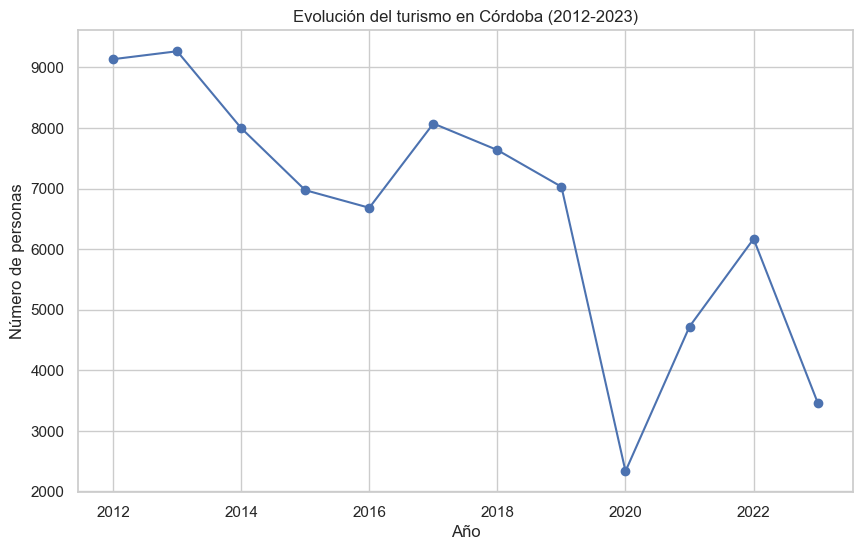

In [43]:
# Crear el gráfico de línea por año
personas_por_año = df_cordoba['anio'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(personas_por_año.index, personas_por_año.values, marker='o', linestyle='-')
plt.title('Evolución del turismo en Córdoba (2012-2023)')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.grid(True)
plt.show()

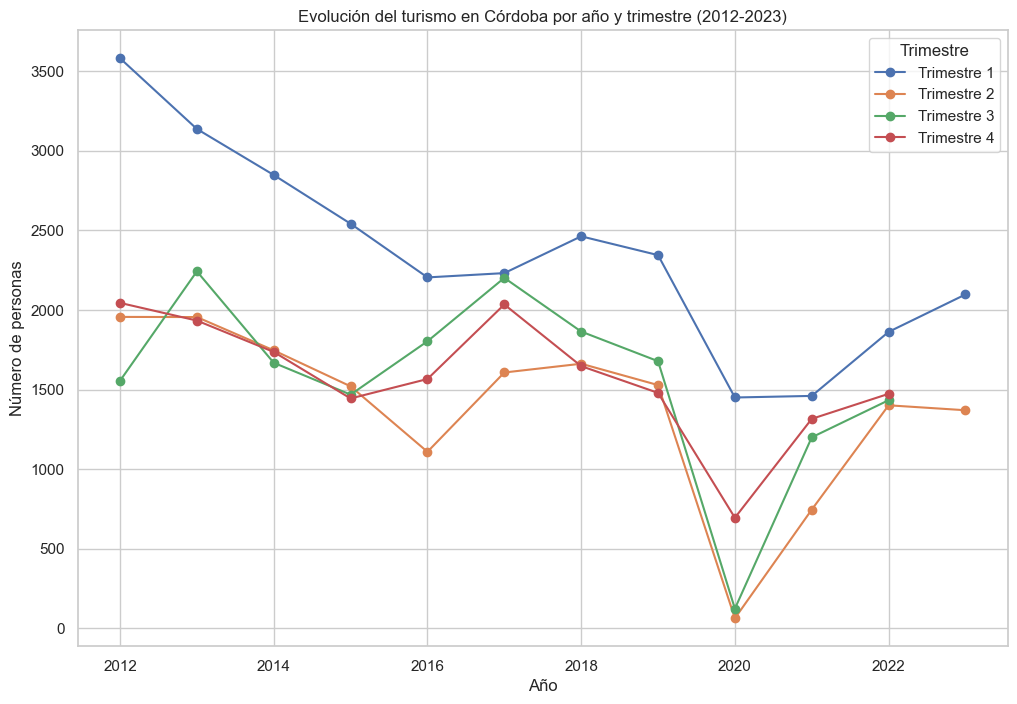

In [44]:
personas_por_año_trimestre = df_cordoba.groupby(['anio', 'trimestre']).size().unstack()

plt.figure(figsize=(12, 8))

for trimestre in personas_por_año_trimestre.columns:
    plt.plot(personas_por_año_trimestre.index, personas_por_año_trimestre[trimestre], marker='o', linestyle='-', label=f'Trimestre {trimestre}')

plt.title('Evolución del turismo en Córdoba por año y trimestre (2012-2023)')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.legend(title='Trimestre')
plt.grid(True)
plt.show()

In [45]:
tabla_personas_por_año_trimestre = df_cordoba.groupby(['anio', 'trimestre']).size().unstack()

# Mostrar la tabla
print(tabla_personas_por_año_trimestre)

trimestre       1       2       3       4
anio                                     
2012       3580.0  1956.0  1555.0  2044.0
2013       3136.0  1955.0  2242.0  1933.0
2014       2847.0  1746.0  1668.0  1736.0
2015       2541.0  1520.0  1468.0  1444.0
2016       2204.0  1109.0  1803.0  1566.0
2017       2231.0  1607.0  2201.0  2034.0
2018       2462.0  1662.0  1864.0  1647.0
2019       2344.0  1528.0  1678.0  1479.0
2020       1450.0    64.0   124.0   695.0
2021       1460.0   746.0  1200.0  1316.0
2022       1862.0  1401.0  1433.0  1473.0
2023       2097.0  1370.0     NaN     NaN


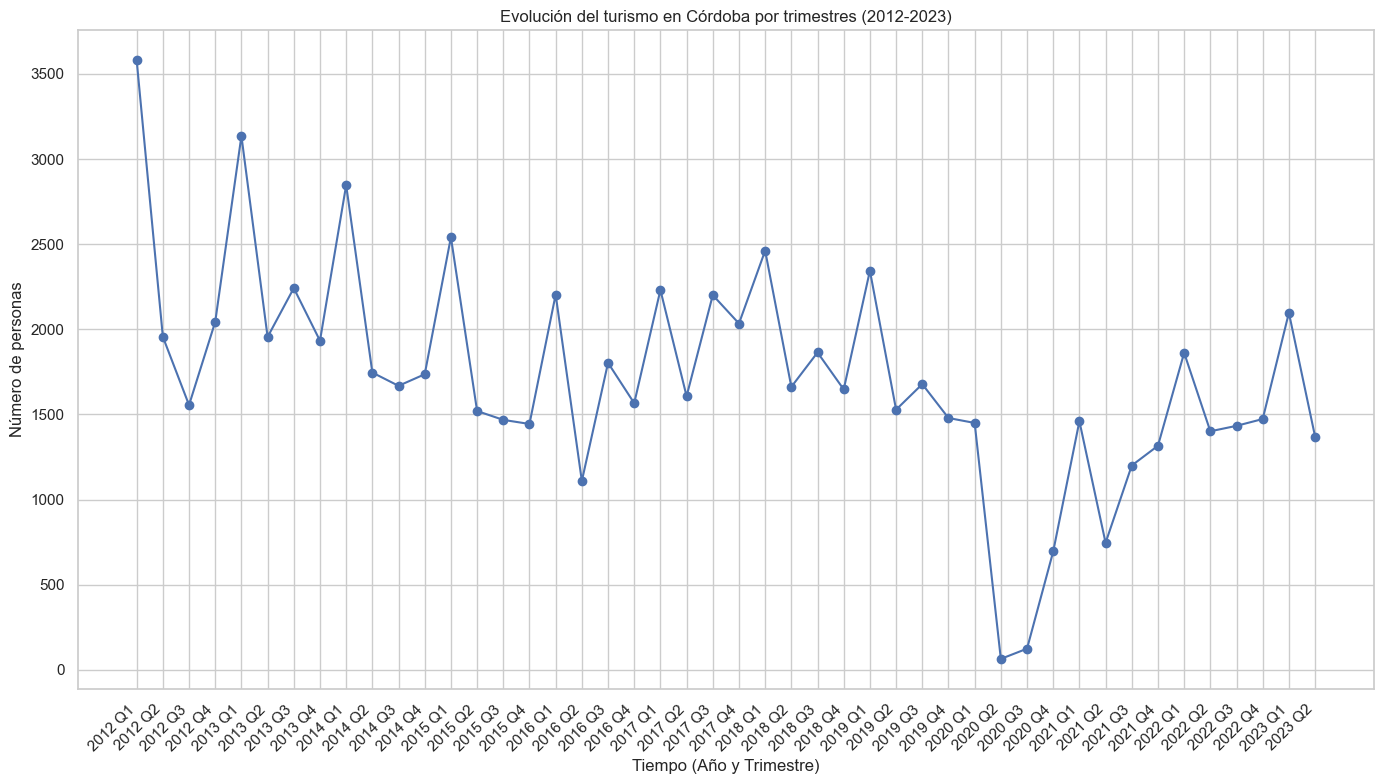

In [46]:
personas_por_trimestre = df_cordoba.groupby(['anio', 'trimestre']).size()

# Restablecer el índice para que sea continuo
personas_por_trimestre = personas_por_trimestre.reset_index(name='personas')

# Crear un nuevo índice que represente el tiempo en trimestres continuos
personas_por_trimestre['tiempo'] = personas_por_trimestre['anio'].astype(str) + ' Q' + personas_por_trimestre['trimestre'].astype(str)

# Crear el gráfico de línea continua
plt.figure(figsize=(14, 8))
plt.plot(personas_por_trimestre['tiempo'], personas_por_trimestre['personas'], marker='o', linestyle='-')
plt.title('Evolución del turismo en Córdoba por trimestres (2012-2023)')
plt.xlabel('Tiempo (Año y Trimestre)')
plt.ylabel('Número de personas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

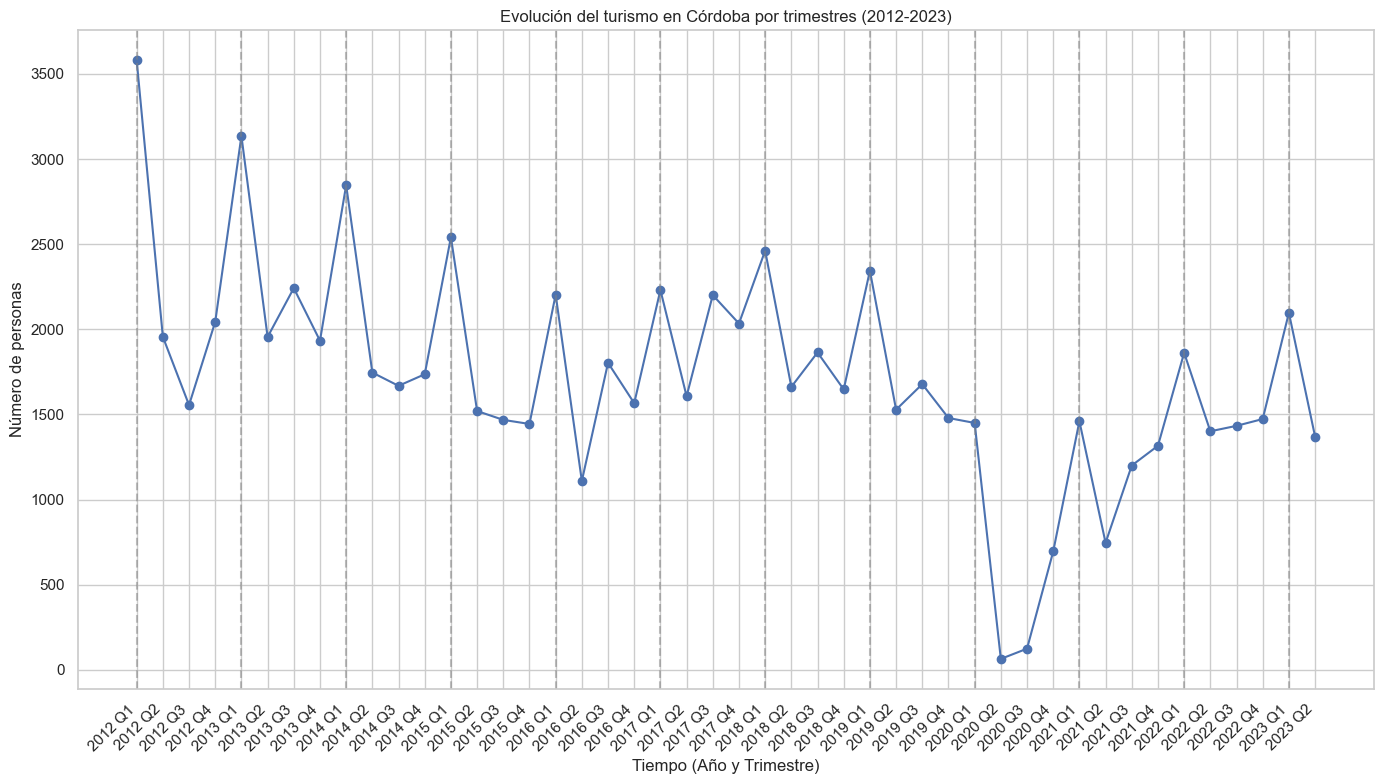

In [47]:
# Crear el gráfico de línea continua para Córdoba
plt.figure(figsize=(14, 8))
plt.plot(personas_por_trimestre['tiempo'], personas_por_trimestre['personas'], marker='o', linestyle='-')

# Agregar líneas verticales que separen cada año
for year in personas_por_trimestre['anio'].unique():
    plt.axvline(x=f"{year} Q1", color='gray', linestyle='--', alpha=0.5)

# Configurar el título y las etiquetas
plt.title('Evolución del turismo en Córdoba por trimestres (2012-2023)')
plt.xlabel('Tiempo (Año y Trimestre)')
plt.ylabel('Número de personas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**AHORA POR LOCALIDADES**

In [48]:
localidades_cordoba = df_cordoba['localidad_destino'].unique()
localidades_cordoba = sorted(localidades_cordoba)
print(localidades_cordoba)

['998', '999', 'Achiras', 'Adelia María', 'Agua de Oro', 'Alcira (Est. Gigena)', 'Alejandro Roca (Est. Alejandro)', 'Alejo Ledesma', 'Alicia', 'Almafuerte', 'Alpa Corral', 'Alta Gracia', 'Altas Cumbres', 'Amboy', 'Ambul', 'Anisacate', 'Arias', 'Arroyito', 'Arroyo Los Patos', 'Ascochinga', 'Atahona', 'Athos Pampa', 'Avellaneda', 'Ballesteros', 'Balnearia', 'Bañado de Soto', 'Bell Ville', 'Bengolea', 'Berrotarán', 'Bialet Massé', 'Bouwer', 'Brinkmann', 'Cabalango', 'Calchín', 'Camilo Aldao', 'Caminiaga', 'Camino de los túneles', 'Camino del cuadrado', 'Canals', 'Candelaria Sur', 'Canteras El Sauce', 'Capilla de Sitón', 'Capilla de los Remedios', 'Capilla del Monte', 'Carnerillo', 'Carrilobo', 'Casa Bamba', 'Casa Grande', 'Cavanagh', 'Cañada de Río Pinto', 'Cañada del Sauce', 'Cerro Champaquí', 'Cerro Colorado', 'Cerro Cuchi Corral', 'Chaján', 'Chancani', 'Charbonier', 'Charras', 'Chazón', 'Chucul', 'Cintra', 'Colazo', 'Colonia Caroya', 'Colonia Las Pichanas', 'Colonia San Bartolomé', 'Co

In [49]:
conteo_localidades = df_cordoba['localidad_destino'].value_counts()
print(conteo_localidades)

localidad_destino
Villa Carlos Paz             17321
Córdoba                       8071
Alta Gracia                   3913
Santa Rosa de Calamuchita     3043
Mina Clavero                  2540
                             ...  
Yocsina                          1
Santa Elena                      1
Silvio Pellico                   1
Villa Ascasubi                   1
Las Palmas                       1
Name: count, Length: 376, dtype: int64


In [50]:
total_localidades = df_cordoba['localidad_destino'].nunique()
print(f"Total de localidades únicas en Córdoba: {total_localidades}")

Total de localidades únicas en Córdoba: 376


In [51]:
Conteo_localidades = df_cordoba['localidad_destino'].value_counts()

# Calcular el porcentaje que representa cada localidad con respecto al total
porcentaje_localidades = (conteo_localidades / conteo_localidades.sum()) * 100

# Crear un DataFrame para mostrar los resultados
df_porcentaje_localidades = pd.DataFrame({
    'Conteo': conteo_localidades,
    'Porcentaje (%)': porcentaje_localidades
})

# Mostrar la tabla con el conteo y porcentaje de cada localidad
print(df_porcentaje_localidades.head())

                           Conteo  Porcentaje (%)
localidad_destino                                
Villa Carlos Paz            17321       21.792630
Córdoba                      8071       10.154628
Alta Gracia                  3913        4.923189
Santa Rosa de Calamuchita    3043        3.828588
Mina Clavero                 2540        3.195732


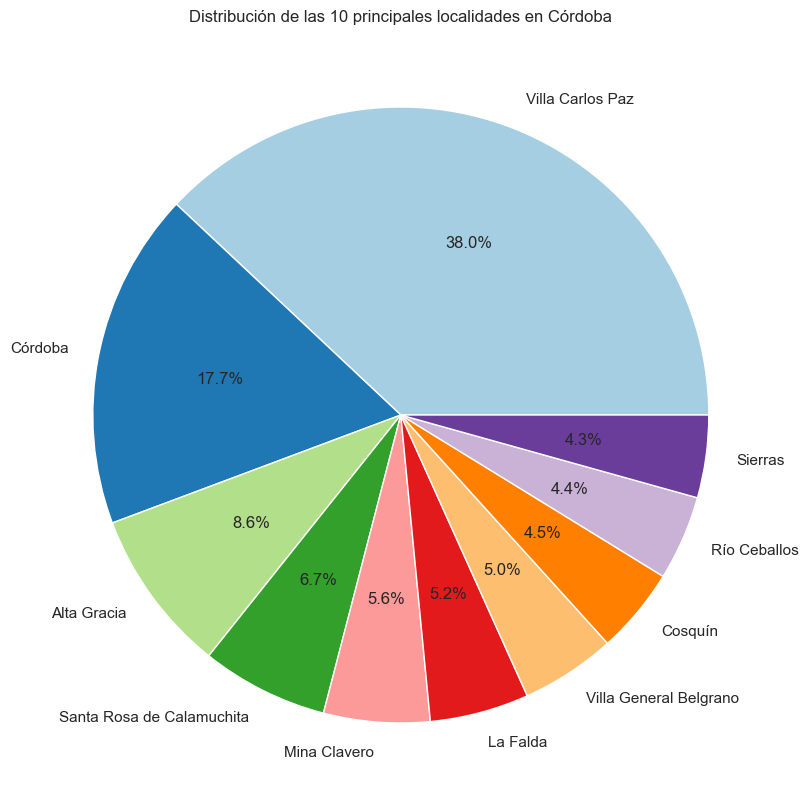

In [52]:
top_localidades = df_porcentaje_localidades.nlargest(10, 'Porcentaje (%)')

# Crear el gráfico de pastel
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.pie(top_localidades['Porcentaje (%)'], labels=top_localidades.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(10)))
plt.title('Distribución de las 10 principales localidades en Córdoba')
plt.show()

In [53]:
df_carlos_paz = df_cordoba[df_cordoba['localidad_destino'] == 'Villa Carlos Paz']

# Mostrar las primeras filas del DataFrame para verificar
df_carlos_paz.head()

,id_hogar,anio,trimestre,region_origen,aglomerado_origen,region_destino,provincia_destino,localidad_destino,tipo_visitante,px06_agrup,...,px17_2_8,px17_2_9,px17_2_10,px17_2_11,px17_2_12,px17_2_13,quintil_pcf_visitante,p005,p006_agrup,nivel_ed
117,221,2012,1,Provincia de Buenos Aires - Resto,Gran La Plata,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,2.0,4,2,3,10
287,311,2012,1,Litoral,Gran Santa Fe,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,1.0,5,1,4,9
290,311,2012,1,Litoral,Gran Santa Fe,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,1.0,5,2,2,8
401,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,2,3,5
404,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,1,1,0


In [54]:
resumen = df_carlos_paz.describe(include='all')
print(resumen)

             id_hogar          anio     trimestre region_origen  \
count    17321.000000  17321.000000  17321.000000         17321   
unique            NaN           NaN           NaN             8   
top               NaN           NaN           NaN        Centro   
freq              NaN           NaN           NaN         13749   
mean    158920.613648   2016.399688      2.257549           NaN   
std     107260.116917      3.253866      1.178377           NaN   
min        221.000000   2012.000000      1.000000           NaN   
25%      66474.000000   2014.000000      1.000000           NaN   
50%     144929.000000   2016.000000      2.000000           NaN   
75%     236857.000000   2019.000000      3.000000           NaN   
max     380031.000000   2023.000000      4.000000           NaN   

       aglomerado_origen region_destino provincia_destino localidad_destino  \
count              17321          17321             17321             17321   
unique                32             

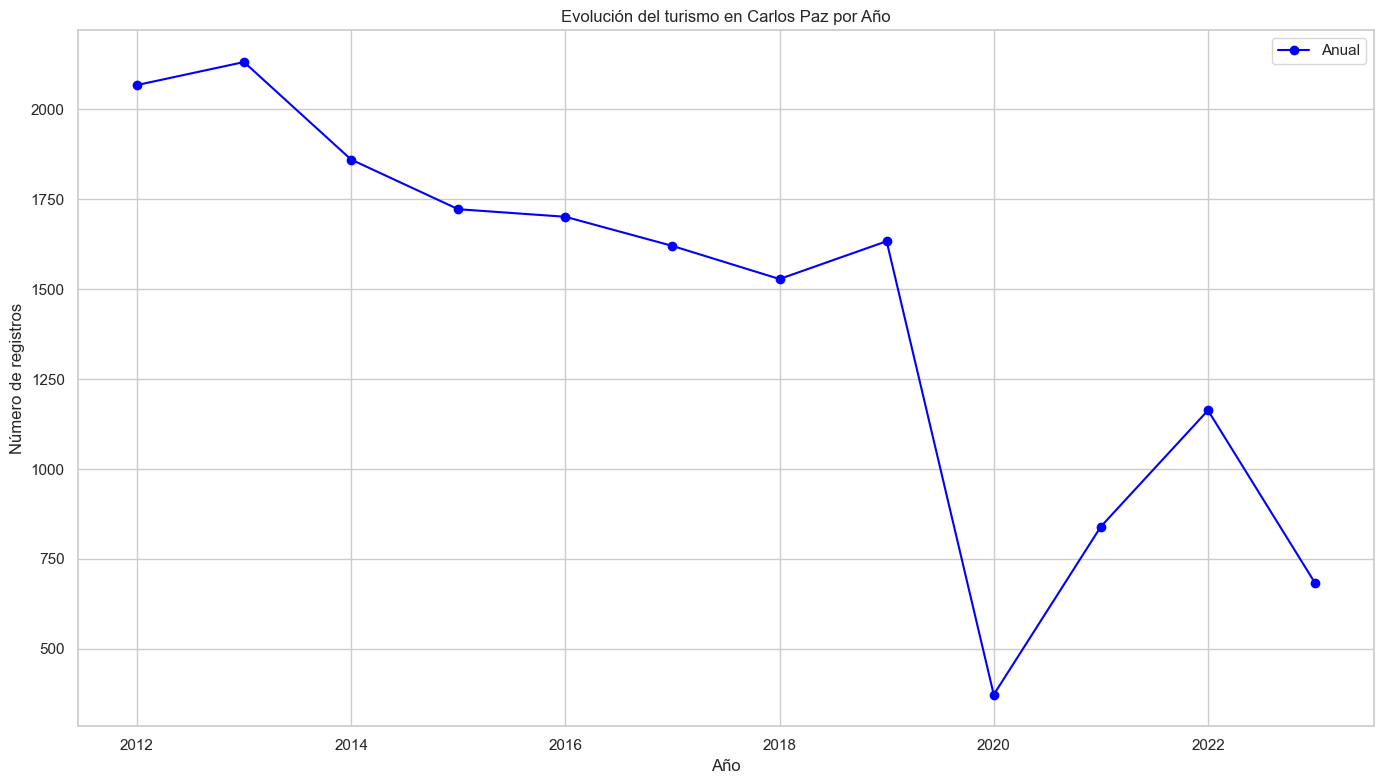

In [55]:
# Conteo de registros anuales
conteo_anual = df_carlos_paz.groupby('anio').size()
# Crear el gráfico de línea para el comportamiento anual
plt.figure(figsize=(14, 8))
plt.plot(conteo_anual.index, conteo_anual.values, marker='o', linestyle='-', color='blue', label='Anual')
plt.title('Evolución del turismo en Carlos Paz por Año')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Número total de visitantes en Carlos Paz por año:
    anio  Número de Visitantes
0   2012                  2067
1   2013                  2131
2   2014                  1860
3   2015                  1722
4   2016                  1701
5   2017                  1620
6   2018                  1528
7   2019                  1633
8   2020                   373
9   2021                   840
10  2022                  1163
11  2023                   683


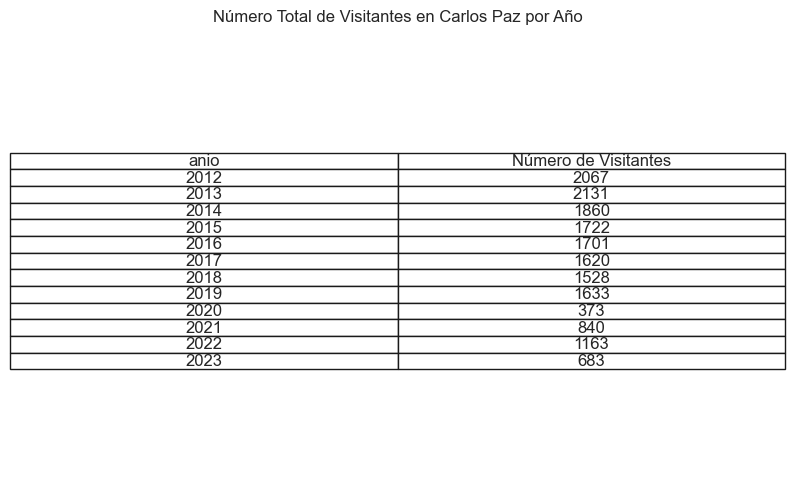

In [56]:
# Agrupar por año y contar el número de registros
total_visitas_anio = df_carlos_paz.groupby('anio').size().reset_index(name='Número de Visitantes')

# Mostrar la tabla
print("Número total de visitantes en Carlos Paz por año:")
print(total_visitas_anio)

# Para una visualización más clara en un entorno como Jupyter Notebook, puedes usar:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.table(cellText=total_visitas_anio.values,
          colLabels=total_visitas_anio.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Oculta los ejes
plt.title('Número Total de Visitantes en Carlos Paz por Año')
plt.show()

In [57]:
df_carlos_paz.head(10)

,id_hogar,anio,trimestre,region_origen,aglomerado_origen,region_destino,provincia_destino,localidad_destino,tipo_visitante,px06_agrup,...,px17_2_8,px17_2_9,px17_2_10,px17_2_11,px17_2_12,px17_2_13,quintil_pcf_visitante,p005,p006_agrup,nivel_ed
117,221,2012,1,Provincia de Buenos Aires - Resto,Gran La Plata,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,2.0,4,2,3,10
287,311,2012,1,Litoral,Gran Santa Fe,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,1.0,5,1,4,9
290,311,2012,1,Litoral,Gran Santa Fe,Centro,Córdoba,Villa Carlos Paz,1,1,...,2.0,1.0,2.0,2.0,2.0,1.0,5,2,2,8
401,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,2,3,5
404,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,1,1,0
409,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,2,2,8
410,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,1,2,4
413,405,2012,1,Centro,Gran Córdoba,Centro,Córdoba,Villa Carlos Paz,2,3,...,2.0,2.0,2.0,2.0,2.0,2.0,4,1,3,5
471,458,2012,1,Norte,Gran Tucumán - TafiViejo,Centro,Córdoba,Villa Carlos Paz,1,3,...,2.0,2.0,1.0,2.0,2.0,2.0,5,2,4,8
472,458,2012,1,Norte,Gran Tucumán - TafiViejo,Centro,Córdoba,Villa Carlos Paz,1,3,...,2.0,2.0,1.0,2.0,2.0,2.0,5,1,4,9


In [58]:
conteo_personas = df_carlos_paz.groupby(['anio', 'trimestre']).size().unstack()

# Muestra el DataFrame resultante
print(conteo_personas)

trimestre      1      2      3      4
anio                                 
2012       835.0  304.0  355.0  573.0
2013       816.0  461.0  422.0  432.0
2014       707.0  326.0  438.0  389.0
2015       660.0  285.0  401.0  376.0
2016       683.0  248.0  442.0  328.0
2017       477.0  274.0  435.0  434.0
2018       586.0  334.0  299.0  309.0
2019       578.0  338.0  424.0  293.0
2020       270.0    4.0   12.0   87.0
2021       300.0  107.0  192.0  241.0
2022       338.0  283.0  301.0  241.0
2023       416.0  267.0    NaN    NaN


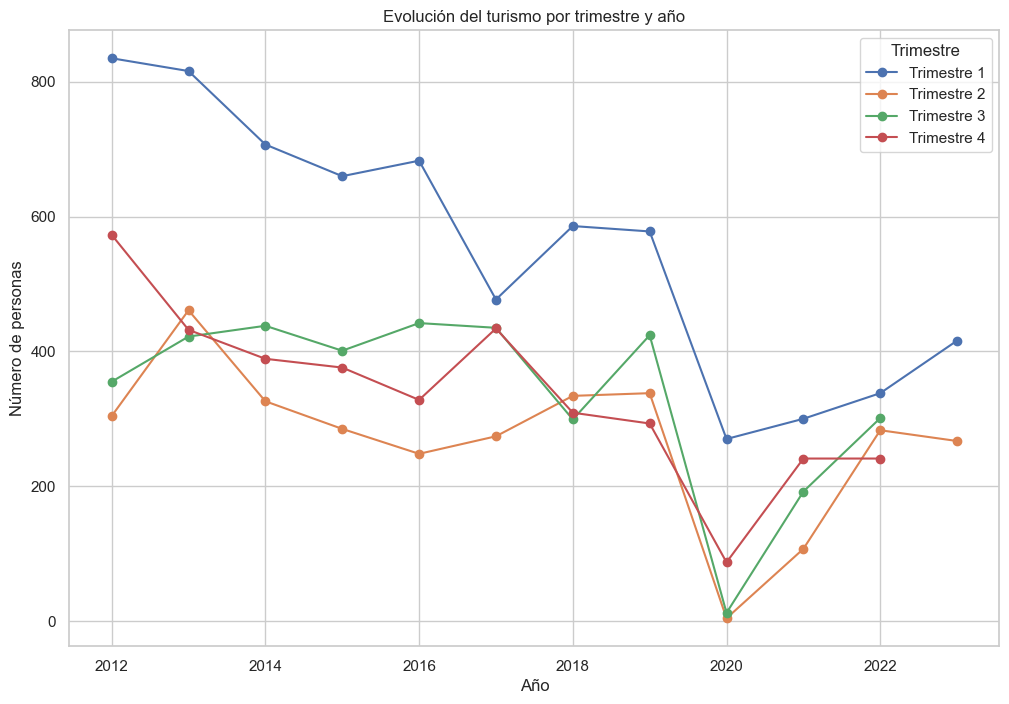

In [59]:
plt.figure(figsize=(12, 8))

# Graficar cada trimestre
for trimestre in conteo_personas.columns:
    plt.plot(conteo_personas.index, conteo_personas[trimestre], marker='o', linestyle='-', label=f'Trimestre {trimestre}')

plt.title('Evolución del turismo por trimestre y año')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.legend(title='Trimestre')
plt.grid(True)
plt.show()

In [60]:
# Agrupar por año, trimestre e id hogar y contar el número de familias únicas
familias_por_trimestre = df_carlos_paz.groupby(['anio', 'trimestre'])['id_hogar'].nunique().reset_index()

# Renombrar columnas para claridad
familias_por_trimestre.columns = ['anio', 'trimestre', 'num_familias']

print(familias_por_trimestre)

    anio  trimestre  num_familias
0   2012          1           210
1   2012          2            83
2   2012          3           101
3   2012          4           147
4   2013          1           206
5   2013          2           115
6   2013          3           123
7   2013          4           116
8   2014          1           187
9   2014          2            90
10  2014          3           105
11  2014          4            91
12  2015          1           190
13  2015          2            85
14  2015          3           125
15  2015          4           103
16  2016          1           181
17  2016          2            74
18  2016          3           108
19  2016          4            85
20  2017          1           135
21  2017          2            78
22  2017          3           125
23  2017          4           103
24  2018          1           159
25  2018          2            89
26  2018          3            97
27  2018          4            94
28  2019      

In [61]:
import pandas as pd

# Supongamos que df_carlos_paz es tu DataFrame con los datos

# Paso 1: Agrupar por id_hogar y contar el tamaño de cada grupo
size_per_household = df_carlos_paz.groupby('id_hogar').size()

# Paso 2: Contar cuántos hogares tienen cada tamaño de grupo
size_counts = size_per_household.value_counts().sort_index()

# Paso 3: Filtrar por el año 2012
df_carlos_paz_2012 = df_carlos_paz[df_carlos_paz['anio'] == 2012]

# Agrupar por id_hogar en 2012 y contar el tamaño de cada grupo
size_per_household_2012 = df_carlos_paz_2012.groupby('id_hogar').size()

# Contar cuántos hogares tienen cada tamaño de grupo en 2012
size_counts_2012 = size_per_household_2012.value_counts().sort_index()

# Convertir a DataFrame para una mejor presentación
result_df = pd.DataFrame({
    'Tamaño del grupo': size_counts_2012.index,
    'Número de hogares': size_counts_2012.values
})

print(result_df)

    Tamaño del grupo  Número de hogares
0                  1                119
1                  2                144
2                  3                 43
3                  4                 97
4                  5                 27
5                  6                 33
6                  8                 21
7                  9                  1
8                 10                  7
9                 12                 13
10                15                  1
11                16                  7
12                18                  2
13                20                  6
14                24                  4
15                28                  1


In [62]:
# Supongamos que df_carlos_paz es tu DataFrame con los datos

# Paso 1: Agrupar por id_hogar, anio, y trimestre y contar el tamaño de cada grupo
size_per_household_by_quarter = df_carlos_paz.groupby(['anio', 'trimestre', 'id_hogar']).size().reset_index(name='personas')

# Paso 2: Contar cuántos hogares tienen cada tamaño de grupo por trimestre
size_counts_by_quarter = size_per_household_by_quarter.groupby(['anio', 'trimestre', 'personas']).size().reset_index(name='cantidad_de_hogares')

# Paso 3: Crear un DataFrame resultante
result_df = size_counts_by_quarter.pivot_table(index=['anio', 'trimestre'], columns='personas', values='cantidad_de_hogares', fill_value=0)

# Mostrar el DataFrame
print(result_df)

personas          1     2     3     4     5     6    7    8    9    10  ...  \
anio trimestre                                                          ...   
2012 1          39.0  57.0  22.0  41.0  13.0  16.0  0.0  6.0  1.0  1.0  ...   
     2          14.0  25.0  10.0  17.0   2.0   8.0  0.0  4.0  0.0  0.0  ...   
     3          30.0  22.0   8.0  18.0   7.0   5.0  0.0  3.0  0.0  4.0  ...   
     4          38.0  43.0   6.0  31.0   5.0   5.0  0.0  4.0  1.0  6.0  ...   
2013 1          39.0  64.0  26.0  34.0   5.0  18.0  0.0  4.0  3.0  4.0  ...   
     2          24.0  32.0  15.0  16.0   6.0  10.0  1.0  3.0  0.0  0.0  ...   
     3          25.0  38.0  16.0  19.0   7.0   5.0  0.0  6.0  0.0  2.0  ...   
     4          35.0  24.0  13.0  20.0   6.0   2.0  0.0  5.0  1.0  2.0  ...   
2014 1          37.0  52.0  29.0  26.0  11.0  12.0  1.0  6.0  1.0  3.0  ...   
     2          16.0  31.0  11.0  16.0   1.0   4.0  0.0  6.0  0.0  1.0  ...   
     3          18.0  29.0  11.0  25.0   6.0   2.0  

In [63]:
size_counts_by_quarter = size_per_household_by_quarter.groupby(['anio', 'trimestre', 'personas']).size().reset_index(name='cantidad_de_hogares')

In [64]:
result_df = size_counts_by_quarter.pivot_table(index=['anio', 'trimestre'], columns='personas', values='cantidad_de_hogares', fill_value=0)